In [56]:
import sympy as sp
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import time

In [57]:

def factorize_n(n):
    # get the prime factorizatoin of n
    a = sp.factorint(n)
    return a


def multiplicative_inverse(e, phi):
    rem = [phi, e]
    quotient = [0, phi // e] # integer division
    x = [1, 0]
    y = [0, 1]

    while(rem[1] != 1):
        x_0 = x[1]
        y_0 = y[1]
        q_0 = quotient[1]
        rem_0 = rem[1]

        x[1] = x[0] - quotient[1] * x[1]
        y[1] = y[0] - quotient[1] * y[1]
        rem[1] = rem[0] % rem[1] 
        quotient[1] = rem_0 // rem[1]
        

        x[0] = x_0
        y[0] = y_0
        quotient[0] = q_0
        rem[0] = rem_0
    
    d = y[1]
    
    return d


def generate_keys(p, q):
    n = p * q
    phi = (p - 1) * (q - 1)
    
    # select integer e that is relatively prime to n and ranges 1 < e < n
    e = phi # initial value so that the loop runs at least once
    while(math.gcd(e, phi) != 1):
        e = rd.randint(2, phi)  # the public key is (e, n)
    # calculate d such that d * e = 1 mod phi
    d = multiplicative_inverse(e, phi) # the private key is (d, n)
    return e, d, n


def generate_pq_for_n_bits():
    # if the file already exists, delete it
    try:
        os.remove("n_e_d.txt")
    except OSError:
        pass
    for bit in (8, 16, 32, 64):  #, 32, 64, 128, 256, 512, 1024, 2048, 4096
        p = 4
        q = 4
        mini = 2 ** (bit - 1)
        while(sp.isprime(p) == False or p < mini):
            p = rd.getrandbits(bit)
        while(sp.isprime(q) == False or p == q or q < mini):
            q = rd.getrandbits(bit)
        
        e, d, n = generate_keys(p, q)
        # write in the file the p, q, n in addition to the bit and the private key d
        with open("n_e_d.txt", "a") as f:
            f.write("n: " + str(n) + " e: " + str(e) + " d: " + str(d) + " bit: " + str(bit) + "\n")



def attack(n, e):
    # get the prime factorization of n
    start = time.time()

    factors = factorize_n(n)
    p = factors.popitem()[0]
    q = factors.popitem()[0]
    phi = (p - 1) * (q - 1)
    d = multiplicative_inverse(e, phi)

    end = time.time()
    total_time = end - start

    return d, total_time



In [58]:
def plot_to_analyze(filepath):
    # plot the data in the file
    with open(filepath, "r") as f:
        data = f.readlines()
        x = []
        y = []
        for line in data:
            x.append(int(line.split(" ")[1]))
            y.append((10**3)*float(line.split(" ")[-1]))
        plt.plot(x, y)
        plt.xlabel("n bits")
        plt.ylabel("time (ms)")
        plt.show()

The attack was successful
The attack was successful
The attack was successful
The attack was successful


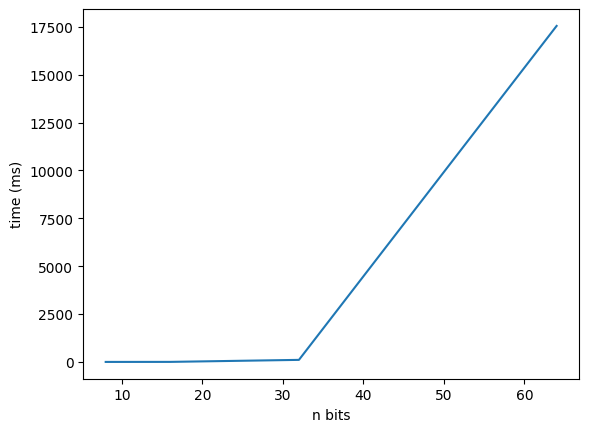

In [59]:
def attack_diff_n_bits():
    generate_pq_for_n_bits()
    # if the file already exists, delete it
    try:
        os.remove("time_bit.txt")
    except OSError:
        pass
    with open("n_e_d.txt", "r") as f:
        lines = f.readlines()
        for line in lines:
            n = int(line.split(" ")[1])
            e = int(line.split(" ")[3])
            bit = int(line.split(" ")[7])
            d_original = int(line.split(" ")[5])
            d, total_time = attack(n, e)
            
            # compare the original d with the one we got from the attack
            if(d_original == d):
                print("The attack was successful")
                # store the time and the bit in a file to compare the time it takes to attack for different n
                with open("time_bit.txt", "a") as f:
                    f.write("bit: " + str(bit) + " time: " + str(total_time) + "\n")

            else:
                print("The attack was not successful")
        plot_to_analyze("time_bit.txt")
            #print("n: " + str(n) + " e: " + str(e) + " d: " + str(d) + " bit: " + str(bit) + " time: " + str(total_time))

attack_diff_n_bits()
